# CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020

## Spotlight - Osama Aftab Toor

#### Summary:
This spotlight showcases a dataset compiled by Gerald Schermann, Sali Zumberi and Jürgen Cito from the University of Zurich for their accepted paper in Mining Software Repositories (MSR) 2018 titled "Structured Information on State and Evolutin of Dockerfiles on Github". The dataset was released as a PostgreSQL database comprising of over 100,000 unique Dockerfiles in over 15,000 Github projects.<br>
<br>
The main idea to take from this spotlight is that this data can be used to create a recommender for Dockerfiles.

#### Contents:
<ol>
    <li>Introduction</li>
    <li>Setup Dataset</li>
    <li>Premilinary Statistics</li>
    <li>Best Practices</li>
    <li>Vizualizations
        <ul>
            <li>Programming Languages</li>
            <li>Topics</li>
        </ul>
    </li>
    <li>Discussion</li>
    <li>References</li>
</ol>

## Introduction
#### Dockerfiles
Before we go into details about the dataset lets define a Dockerfile. A Dockerfile is primarily a build script to create and deploy a Docker container.<br>
Docker containers are lightweight isolated processes that emulate a complete software application which can be packaged and deployed anywhere that can support Docker.<br>

The Google Trends graph of searches for the term "docker" over the last five years:
<img src="dockergoogletrend.png"/>

The above figure shows steady growth in search for Docker since its introduction in 2013 hence the relevance of this spotlight.

A typical Dockerfile consists of three parts:
<ul>
    <li>A pre-build state (base image)</li>
    <li>Build State (modifications to the base)</li>
    <li>Run State</li>
</ul>

Below is an example of dockerfile that creates a devlopment environment for Java using OpenJDK 8 and Gradle 4.4
```
FROM openjdk:8 
  
ENV GRADLE_VERSION 4.4  
ENV GRADLE_HOME /opt/gradle-${GRADLE_VERSION}  
ENV GRADLE_BIN_ZIP gradle-${GRADLE_VERSION}-bin.zip  
ENV GRADLE_USER_HOME /cache  
ENV BUILD_HOME /build  
  
RUN set -x \  
&& curl -L http://downloads.gradle.org/distributions/${GRADLE_BIN_ZIP} -o
/tmp/${GRADLE_BIN_ZIP} \  
&& unzip /tmp/${GRADLE_BIN_ZIP} -d /opt/ \  
&& rm /tmp/${GRADLE_BIN_ZIP}  
  
WORKDIR $BUILD_HOME  
VOLUME $GRADLE_USER_HOME  
ENV PATH $PATH:${GRADLE_HOME}/bin  
```

The first instruction sets up the base image, the last three setup the run state while the remaining are modifications to the base. Using this simple configuration a user can have a directory ('/build' in the above case) that can be used to develop program for specific version of Java and Gradle without installing anything on their host machine.

#### Dataset
Now that we have established what the dataset represents, let's talk about how its presented. The author's original objective was to compile the evolution of dockerfiles from popular Github repositories. The following image describes how information about Dockerfiles are stored in the provided PostgreSQL database.
<img src="erd.png"/>

Each project is represented as a entry in the 'project' table. A project can have multiple dockerfiles represented in the 'dockerfile' table. Each dockerfile can exist as one or multiple snapshots, indexed using the 'snapshot' table. Snapshots are meant to represent commits to the project. Changes from one snapshot to another are represented in the 'snap_diff' while each change (line of code update) is represented in the 'diff'. There can be four kinds of changes: 'Add', 'Update', 'Remove' and 'None'. From all of the snapshots, the latest one has column 'current' set as True. Each kind of instruction is represented in its own table indexed by 'snap_id'.

Further details of each table can be found <a href="https://github.com/sealuzh/msr18-docker-dataset">here</a>.

## Setup Dataset
Since this dataset exists as a PostgreSQL database the first and foremost step would be install PostgreSQL server to host the database. Setup and details can be found <a href="https://www.postgresql.org/">here</a>. Once server has been downloaded and installed; create a database named 'db_docker' using the GUI pgadmin4 (<a href="https://www.pgadmin.org/">details</a>).

The compressed version (~1.5 GB) of the dataset can be downloaded from <a href="https://zenodo.org/record/1200869/files/msr18_docker_dataset.sql.gz">here</a>.

On linux the database can be populated using the following instruction:
```gunzip -c msr18_docker_dataset.sql.gz | psql docker_db```

The database the instruction assumes a database named 'docker_db' has already been created and requires ~25 GB of additional storage. The system takes roughly 30mins to load all data to the database.

#### Conda Environment
The following packages are required to run the remaining notebook:
<ul>
    <li>matplotlib</li>
    <li>jupyter</li>
    <li>requests</li>
    <li>sqlalchemy</li>
    <li>psycopg2</li>
</ul>
The following is the contents for 'environment.yml' for this notebook.<br>

```
name: spotlight_128001540
channels:
  - defaults
dependencies:
  - asn1crypto=1.3.0=py37_0
  - attrs=19.3.0=py_0
  - backcall=0.1.0=py37_0
  - blas=1.0=mkl
  - bleach=3.1.0=py37_0
  - ca-certificates=2020.1.1=0
  - certifi=2020.4.5.1=py37_0
  - cffi=1.14.0=py37h7a1dbc1_0
  - chardet=3.0.4=py37_1003
  - colorama=0.4.3=py_0
  - cryptography=2.8=py37h7a1dbc1_0
  - cycler=0.10.0=py37_0
  - decorator=4.4.2=py_0
  - defusedxml=0.6.0=py_0
  - entrypoints=0.3=py37_0
  - freetype=2.9.1=ha9979f8_1
  - icc_rt=2019.0.0=h0cc432a_1
  - icu=58.2=ha66f8fd_1
  - idna=2.9=py_1
  - importlib_metadata=1.5.0=py37_0
  - intel-openmp=2020.0=166
  - ipykernel=5.1.4=py37h39e3cac_0
  - ipython=7.13.0=py37h5ca1d4c_0
  - ipython_genutils=0.2.0=py37_0
  - ipywidgets=7.5.1=py_0
  - jedi=0.16.0=py37_1
  - jinja2=2.11.1=py_0
  - jpeg=9b=hb83a4c4_2
  - jsonschema=3.2.0=py37_0
  - jupyter=1.0.0=py37_7
  - jupyter_client=6.1.2=py_0
  - jupyter_console=6.1.0=py_0
  - jupyter_core=4.6.3=py37_0
  - kiwisolver=1.1.0=py37ha925a31_0
  - krb5=1.16.4=hc04afaa_0
  - libpng=1.6.37=h2a8f88b_0
  - libpq=11.2=h3235a2c_0
  - libsodium=1.0.16=h9d3ae62_0
  - m2w64-gcc-libgfortran=5.3.0=6
  - m2w64-gcc-libs=5.3.0=7
  - m2w64-gcc-libs-core=5.3.0=7
  - m2w64-gmp=6.1.0=2
  - m2w64-libwinpthread-git=5.0.0.4634.697f757=2
  - markupsafe=1.1.1=py37he774522_0
  - matplotlib=3.1.3=py37_0
  - matplotlib-base=3.1.3=py37h64f37c6_0
  - mistune=0.8.4=py37he774522_0
  - mkl=2020.0=166
  - mkl-service=2.3.0=py37hb782905_0
  - mkl_fft=1.0.15=py37h14836fe_0
  - mkl_random=1.1.0=py37h675688f_0
  - msys2-conda-epoch=20160418=1
  - nbconvert=5.6.1=py37_0
  - nbformat=5.0.4=py_0
  - notebook=6.0.3=py37_0
  - numpy=1.18.1=py37h93ca92e_0
  - numpy-base=1.18.1=py37hc3f5095_1
  - openssl=1.1.1f=he774522_0
  - pandas=1.0.3=py37h47e9c7a_0
  - pandoc=2.2.3.2=0
  - pandocfilters=1.4.2=py37_1
  - parso=0.6.2=py_0
  - pickleshare=0.7.5=py37_0
  - pip=20.0.2=py37_1
  - prometheus_client=0.7.1=py_0
  - prompt-toolkit=3.0.4=py_0
  - prompt_toolkit=3.0.4=0
  - psycopg2=2.8.4=py37h7a1dbc1_0
  - pycparser=2.20=py_0
  - pygments=2.6.1=py_0
  - pyopenssl=19.1.0=py37_0
  - pyparsing=2.4.6=py_0
  - pyqt=5.9.2=py37h6538335_2
  - pyrsistent=0.16.0=py37he774522_0
  - pysocks=1.7.1=py37_0
  - python=3.7.7=h60c2a47_0_cpython
  - python-dateutil=2.8.1=py_0
  - pytz=2019.3=py_0
  - pywin32=227=py37he774522_1
  - pywinpty=0.5.7=py37_0
  - pyzmq=18.1.1=py37ha925a31_0
  - qt=5.9.7=vc14h73c81de_0
  - qtconsole=4.7.2=py_0
  - qtpy=1.9.0=py_0
  - requests=2.23.0=py37_0
  - send2trash=1.5.0=py37_0
  - setuptools=46.1.3=py37_0
  - sip=4.19.8=py37h6538335_0
  - six=1.14.0=py37_0
  - sqlalchemy=1.3.15=py37he774522_1
  - sqlite=3.31.1=he774522_0
  - terminado=0.8.3=py37_0
  - testpath=0.4.4=py_0
  - tk=8.6.8=hfa6e2cd_0
  - tornado=6.0.4=py37he774522_1
  - traitlets=4.3.3=py37_0
  - urllib3=1.25.8=py37_0
  - vc=14.1=h0510ff6_4
  - vs2015_runtime=14.16.27012=hf0eaf9b_1
  - wcwidth=0.1.9=py_0
  - webencodings=0.5.1=py37_1
  - wheel=0.34.2=py37_0
  - widgetsnbextension=3.5.1=py37_0
  - win_inet_pton=1.1.0=py37_0
  - wincertstore=0.2=py37_0
  - winpty=0.4.3=4
  - zeromq=4.3.1=h33f27b4_3
  - zipp=2.2.0=py_0
  - zlib=1.2.11=h62dcd97_3
prefix: C:\Users\osama\Anaconda3\envs\spotlight_128001540
```

<br>
Use `conda env create --name <name_here> --file /path/to/environment.yml` to install all dependencies for this notebook.

Lets configure sqlalchemy to connect to our database. The following code block assumes that database has been imported and psql is running locally.

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import requests

UNAME = 'postgres' # default username for psql
PASSW = 'psql123!@#' # this may change based on your setup
DB    = 'db_docker'
PSQL  = 'postgresql://{}:{}@localhost/{}'.format(UNAME, PASSW, DB)
DOCKER_REPO_URL = "https://hub.docker.com/v2/repositories"

In [2]:
# Block for common functions

# Connect to the database
def connect_db(driver):
    return create_engine(driver)

# Get frequency of different ports in the database
def get_ports(engine, limit=10):
    query = '''
    SELECT port, count(port) FROM df_expose
    WHERE current=true
    GROUP BY port
    ORDER BY count DESC
    '''
    query = "{} LIMIT {}".format(query, limit)
    df = pd.read_sql(query, engine)
    df['port'] = df['port'].astype(str)
    return df

# Get frequency of different base images in the database
def get_images(engine, limit=10):
    query = '''
    SELECT imagename, count(imagename) FROM df_from
    WHERE current=true
    GROUP BY imagename
    ORDER BY count DESC
    '''
    query = "{} LIMIT {}".format(query, limit)
    return pd.read_sql(query, engine)

# Get list of dockerfiles
def get_snapshots(engine):
    query = '''
    SELECT snap_id FROM snapshot
    WHERE current=true
    '''
    total = pd.read_sql(query, engine)
    return total, len(total)

# Get frequency of image versions
def get_img_versions(engine, limit=10):
    query = '''
    SELECT imageversionnumber, count(imageversionnumber) FROM df_from
    WHERE current=true AND imagename='ubuntu'
    GROUP BY imageversionnumber
    ORDER BY count DESC
    '''
    query = "{} LIMIT {}".format(query, limit)
    df = pd.read_sql(query, engine)
    df['imageversionnumber'] = df['imageversionnumber'].astype(str)
    df = df.replace(to_replace=str(0.0), value ="latest")
    return df

# Get dockerfiles that can be considered production
def get_prod_snapshots(engine):
    query = '''
    SELECT DISTINCT(snap_id) FROM (
        (
            SELECT snap_id FROM df_healthcheck
            WHERE current = true
        )
        UNION (
            SELECT snap_id FROM df_stopsignal
            WHERE current = true
        )
        UNION (
            SELECT snap_id FROM df_env
            WHERE current = true AND key_value ILIKE '%%prod%%'
        )
    ) AS foo
    '''
    prod = pd.read_sql(query, engine)
    return prod, len(prod)

# Get base image and its version, per dockerfile
def get_image_data(engine):
    query = '''
    SELECT snap_id, imagename, imageversionnumber FROM df_from
    WHERE current=true
    '''
    df = pd.read_sql(query, engine)
    df['imageversionnumber'] = df['imageversionnumber'].astype(str)
    df = df.replace(to_replace=str(0.0), value ="latest")
    return df

# Fetch imgae sizes from dockerhub
def get_image_sizes(images, limit=20):
    sizes = dict()
    for _, row in images.iterrows():
        _img_name, _img_ver, user = row.imagename, row.imageversionnumber, None
        if _img_name in sizes:
            sizes[_img_name][1] += 1
            continue
        if '/' in _img_name:
            details = _img_name.split('/')
            img = details[-1]
            user = '/'.join(details[0:-1])
            if ':' in img:
                img, tag = img.split(':')
            req_url = '{}/{}/{}/tags'.format(DOCKER_REPO_URL, user, img)
        elif ':' in _img_name:
            img, tag = img.split(':')
            req_url = '{}/library/{}/tags?name={}'.format(DOCKER_REPO_URL, img, tag)
        else:
            req_url = '{}/library/{}/tags?name={}'.format(DOCKER_REPO_URL, _img_name, _img_ver)
        res = requests.get(req_url)
        if res.status_code == 200:
            t = res.json()
            if int(t['count']) > 0: 
                sizes[_img_name] = [t['results'][0]['full_size'], 0]
            else:
                sizes[_img_name] = [0, 0]
    return {k: v for k, v in sorted(sizes.items(), key = lambda x: x[1][1], reverse = True)[0:limit]}

# Get frequency of run instructions per dockerfile
def get_run_instructions_per_snapshot(engine):
    query = '''
    SELECT snap_id, count(run_id) FROM df_run
    WHERE current = true
    GROUP BY snap_id
    ORDER BY count DESC
    '''
    return pd.read_sql(query, engine)

# Get dockerfiles that defined a non-root user
def get_user_mode_snapshots(engine):
    query = '''
    SELECT DISTINCT snap_id from df_user
    WHERE current = true
    '''
    umods = pd.read_sql(query, engine)
    return umods, len(umods)

engine = connect_db(PSQL)

## Preliminary Statistics
Once the SQL engine is setup, we can run queries and visulize some statistics.

#### Port Number
The following block finds the most popular ports used in the entire dataset. We can see that port '80' is the most popular since majority of Docker applcaitions are used to create web servers.

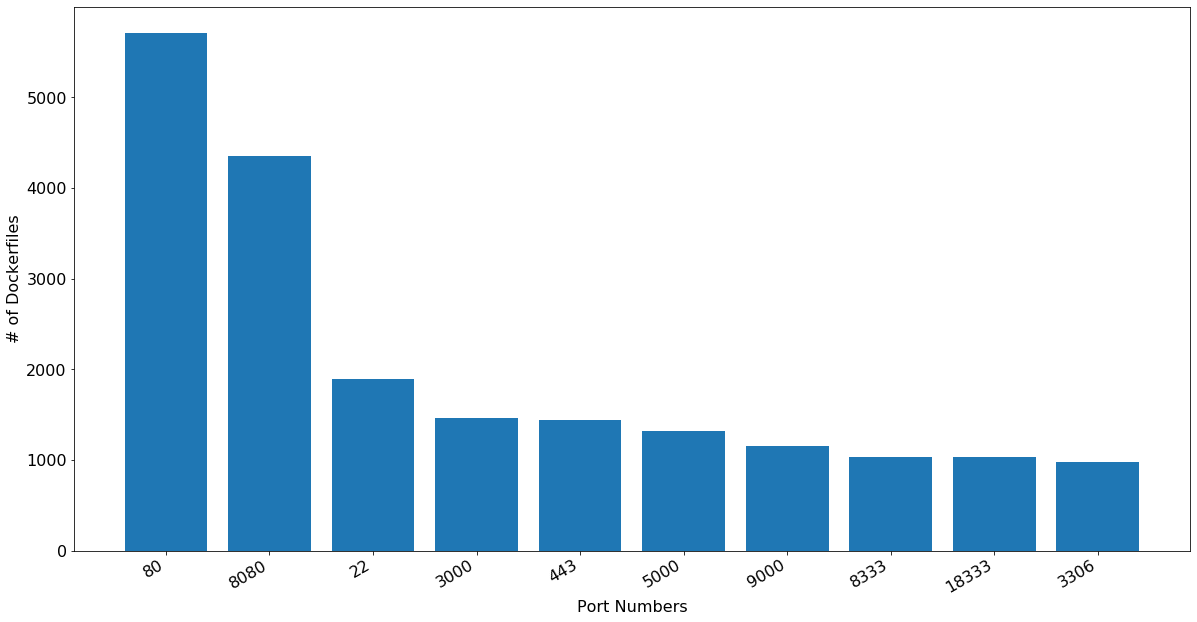

In [3]:
df = get_ports(engine, limit=10)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(df['port'].tolist(), df['count'].tolist())
plt.xlabel("Port Numbers")
plt.ylabel("# of Dockerfiles")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

#### Base Image
The bar chart below shows that 'ubuntu' is the most popular image in the dataset while the next bar chart shows ubuntu 14.04 is the most popular version of ubuntu image used.

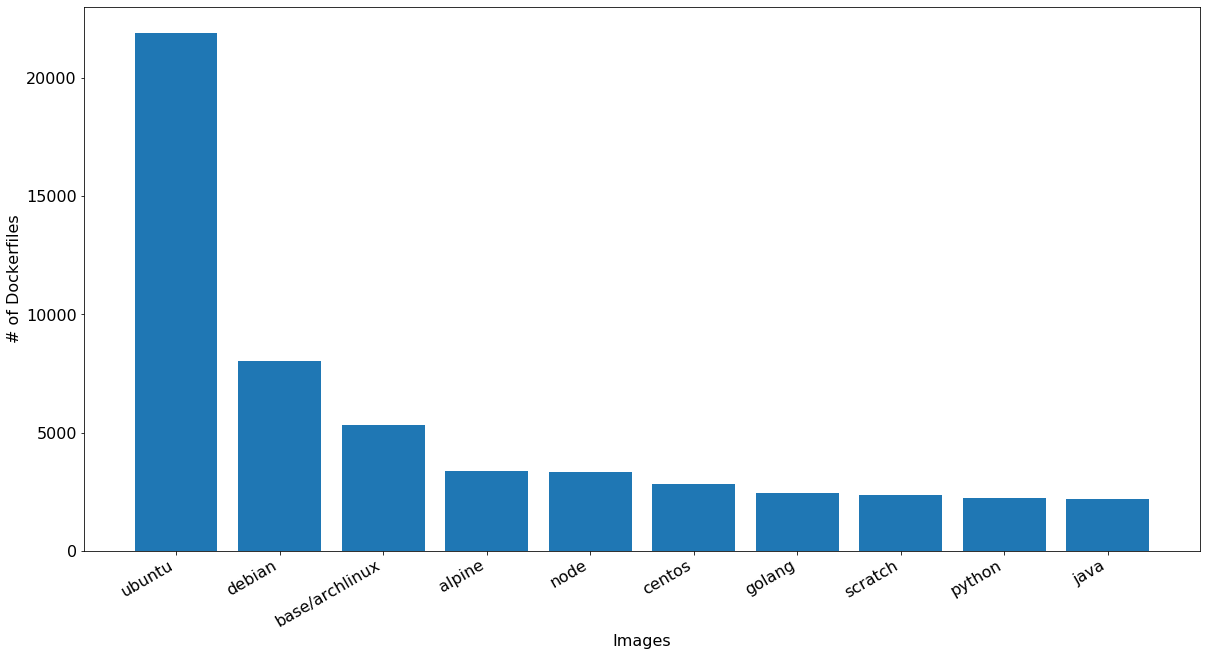

In [4]:
df = get_images(engine, limit=10)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(df['imagename'].tolist(), df['count'].tolist())
plt.xlabel("Images")
plt.ylabel("# of Dockerfiles")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

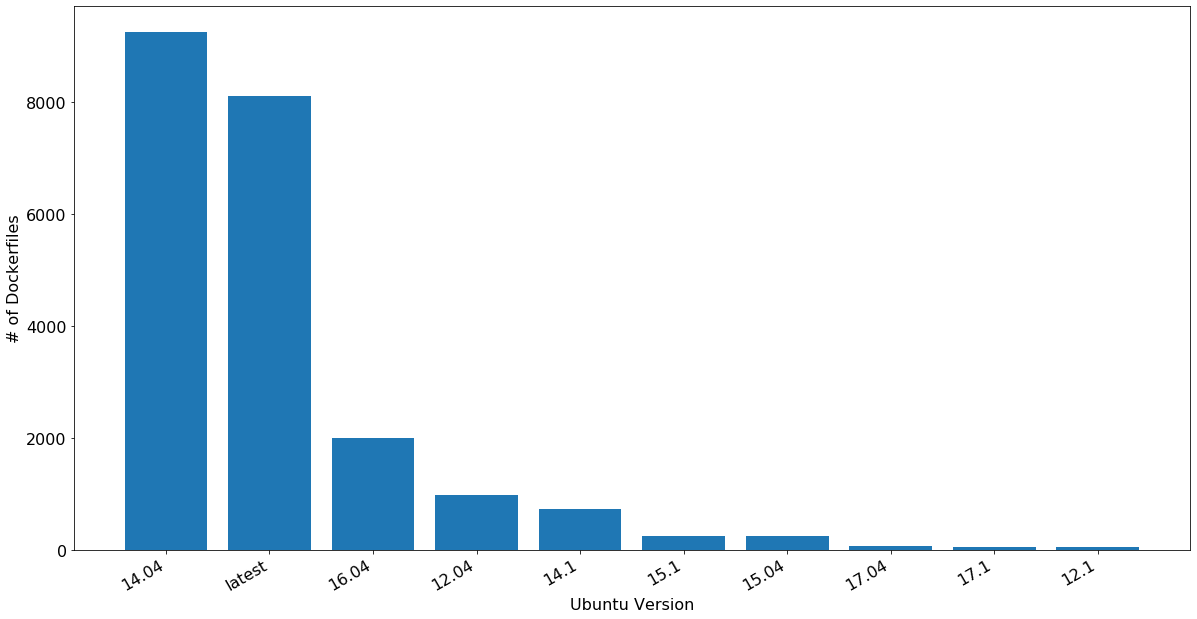

In [5]:
df = get_img_versions(engine, limit=10)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(list(map(str, df['imageversionnumber'].tolist())), df['count'].tolist())
plt.xlabel("Ubuntu Version")
plt.ylabel("# of Dockerfiles")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

#### Development vs Production
Our first attempt at classification would be to split snapshots into those meant for production and ones for development. To achieve this we will look at two things.
<ul>
    <li>if any environment variable related to production has been configured</li>
    <li>if the dockerfile employs any healthchecks or stopsignals</li>
</ul>
If any of the above criteria match then the dockerfile is a production file.

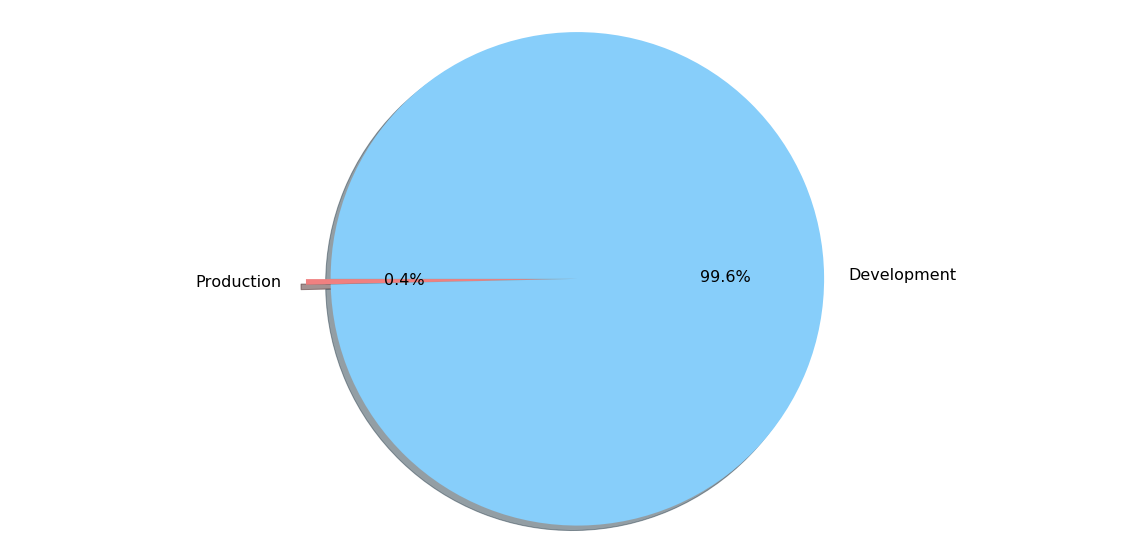

In [6]:
_, total = get_snapshots(engine)
_, prod = get_prod_snapshots(engine)
dev = total - prod

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.pie(
    [(prod/total * 100), (dev/total * 100)],
    explode=(0.1, 0), labels=['Production', 'Development'], colors=['lightcoral', 'lightskyblue'],
    autopct='%1.1f%%', shadow=True, startangle=180
)
plt.axis('equal')
plt.show()

We can see that majority of dockerfiles don't employ healthchecks, stopsignals or any environment variables that are recommended for production environments. There is an argument that the dataset could be skewed to only include development docker files but considering the fact we are looking at production level docker images like the docker repository itself, kubernetes and etherium; our claim is based on a valid assumption.

## Best Practices
Another instance where I found this dataset to be useful was to deduce whether popular Github projects followed some best practices when writing Dockerfiles.

#### Use light-weight images for Production
Lighter image means shorter bring-up time and recovery is faster when system crashes. We can see that two of most used images for production level dockerfiles are 'node' and 'ubuntu'. While the former is a considerably large image (350MB) the latter is light-weight (60MB). Similarly, average image size is on the lower side (aroung 150MB).

In [7]:
prod, _ = get_prod_snapshots(engine)
img_data = get_image_data(engine)

prod_images = img_data[img_data['snap_id'].isin(prod['snap_id'])]
sizes = get_image_sizes(prod_images)

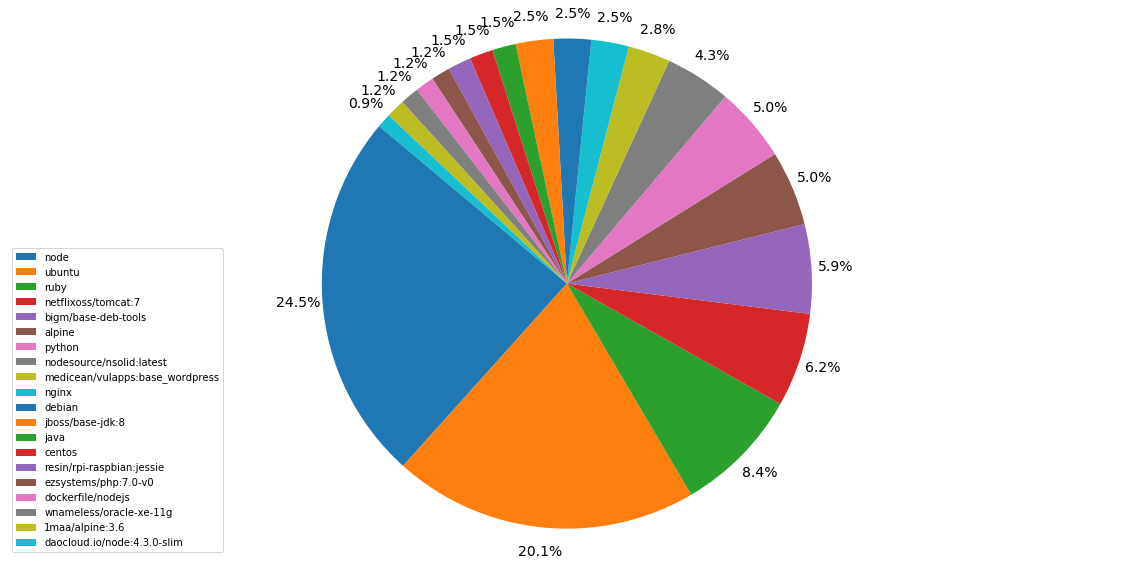

In [8]:
# Plot
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,10))
plt.pie(
    [c[1] for c in sizes.values()], labels=sizes.keys(),
    autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=None
)
plt.axis('equal')
plt.legend(loc=3, prop={'size': 10})
plt.show()

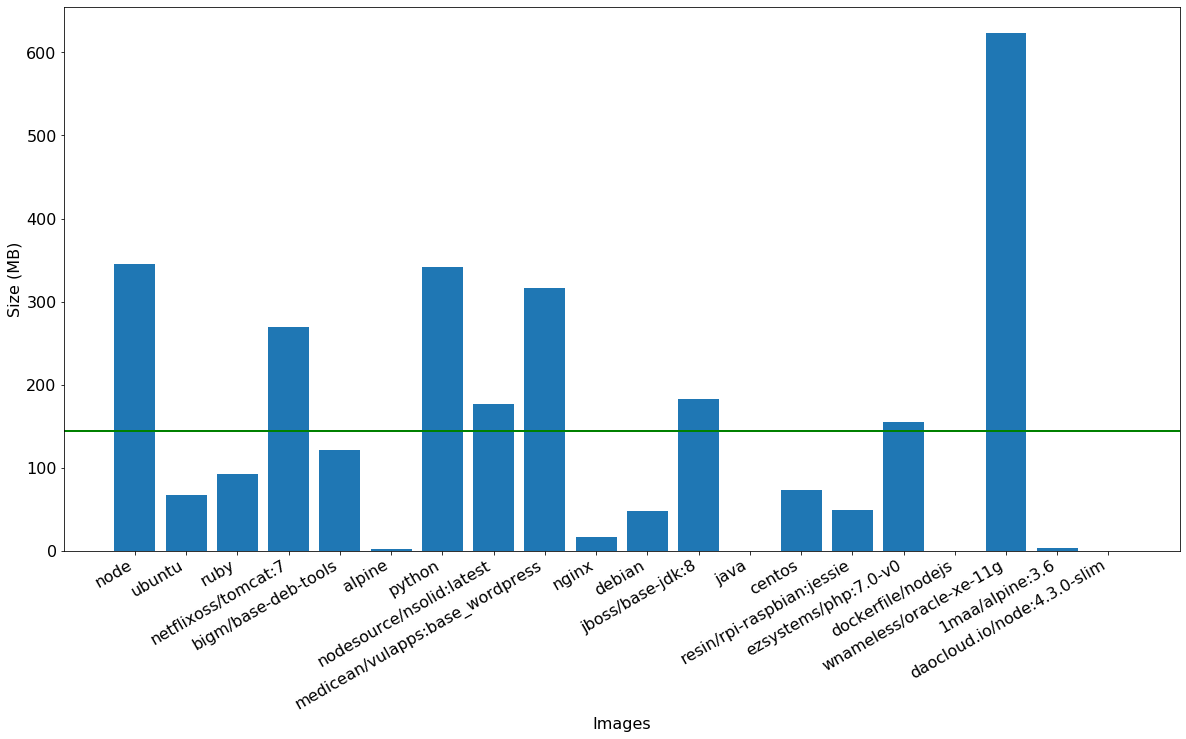

In [9]:
data = [c[0]/(1024**2) for c in sizes.values()]
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(sizes.keys(), data)
plt.xlabel("Images")
plt.ylabel("Size (MB)")
plt.xticks(rotation=30, horizontalalignment='right')
plt.axhline(sum(data)/len(data), color='green', linewidth=2)
plt.show()

#### Multiple Run Instructions
If is often recommended to reduce the amount of RUN instructions as they create intermediate images during the build. Using our dataset we can evaluate the percentage on dockerfiles that follow this guideline. Only 20% of dockerfiles in our dataset adhere to this optimal rule of combining RUN instructions.

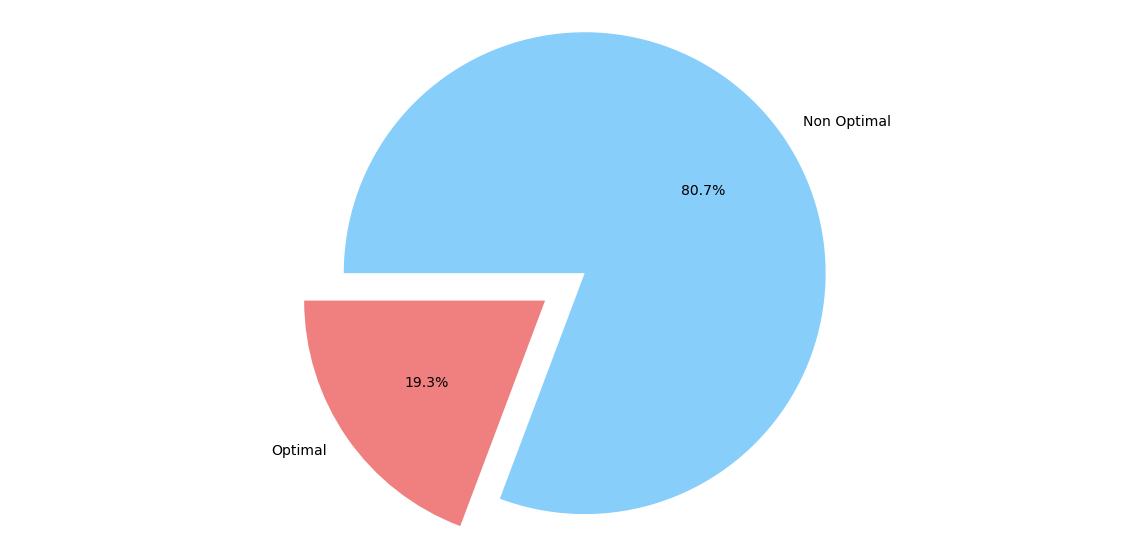

In [10]:
rc = get_run_instructions_per_snapshot(engine)
optimal = rc[rc['count'] <= 1]
non_optimal = rc[rc['count'] > 1]

# Plot
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,10))
plt.pie(
    [len(optimal), len(non_optimal)], labels=['Optimal', 'Non Optimal'],
    colors=['lightcoral', 'lightskyblue'],
    autopct='%1.1f%%', startangle=180, explode=(0.2, 0)
)
plt.axis('equal')
plt.show()

#### Privilidged Dockerfiles
Often times developers don't consider the consequences of running everything with 'sudo'. Docker shares the same beliefs and runs all processes as 'sudo'. While installing packages does require root privilidges, developers must make sure that application processes are run in non-privilidged mode. The following chart shows that only 6% of docker files run as non-root, which is a big security concern.

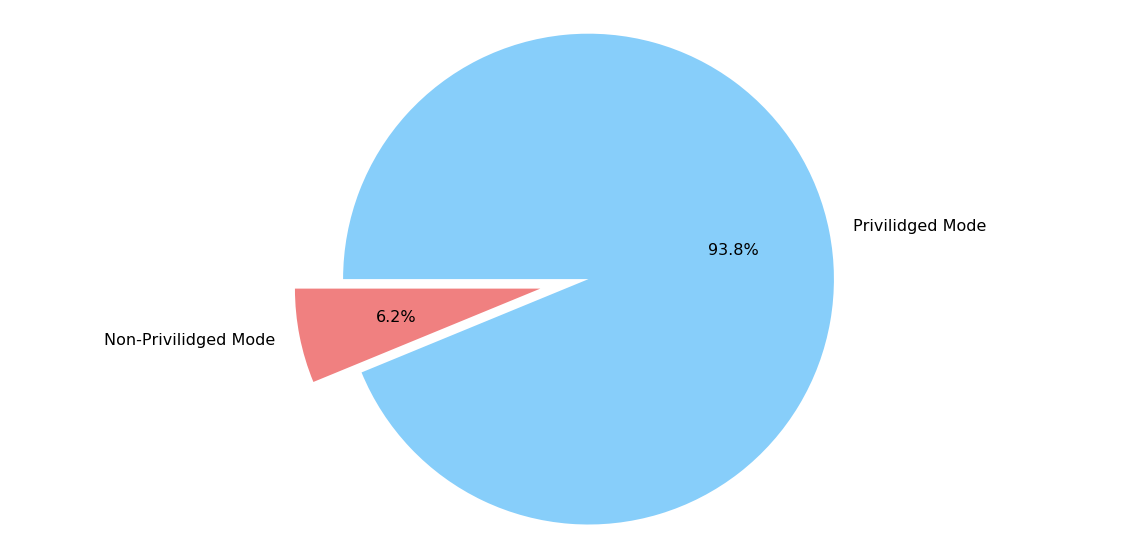

In [11]:
_, non_root = get_user_mode_snapshots(engine)
_, total = get_snapshots(engine)
root = total - non_root

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.pie(
    [(non_root/total * 100), (root/total * 100)],
    explode=(0.2, 0), labels=['Non-Privilidged Mode', 'Privilidged Mode'],
    colors=['lightcoral', 'lightskyblue'],
    autopct='%1.1f%%', startangle=180
)
plt.axis('equal')
plt.show()

## Vizualizations
Now that we have established some basic capabilities and insights we can extract from the dataset; lets move to something more advanced. As stated earlier we want to show potential that this dataset can be used to make recommendations.<br>

In order to achieve that we need a formal representation of a dockerfile.<br>

#### Docker Representation
According to this dataset we can represent our Dockerfile using four main features:
<ul>
    <li>Base Image</li>
    <li>A list of packages used</li>
    <li>A list of possible Programming Languages for the project</li>
    <li>A list of Topics pertaining to the end-product</li>
</ul>
The first three can simply be extracted from the dockerfile, the latter two can be extracted from Github. Which I will demonstrate in this section.<br>

Once we have establish that we can provide recommendations.<br>
Recommendations would be suggestions such as recommended port for the type of application, recommended packages, privilidge settings, size of image. Similarly based on evolution of the dockerfile, we can propose changes early on as our dataset holds not only current state but also all previous states of a particular dockerfile.<br>

Since there is limit on the number of requests we can send to Github per hour, we will limit out dataset to the first 2000 dockerfiles.

In [12]:
# Common function block

import re
import itertools

TOKEN = 'af1a19e5246916a7cb2fbff1a5252057630bace5'
headers = {
    'Authorization': 'token %s' % TOKEN,
    'Accept': 'application/vnd.github.mercy-preview+json'
}
MAX_GIT_REQS = 2000

# Get RUN instructions with the actual command from all dockerfiles
def get_indexed_runs(engine):
    query = '''
    SELECT snap_id, executable, run_params FROM df_run
    WHERE current = true
    '''
    return pd.read_sql(query, engine)

# Get ports per dockerfile
def get_indexed_ports(engine):
    query = '''
    SELECT snap_id, port FROM df_expose
    WHERE current = true
    '''
    return pd.read_sql(query, engine)

# Function used to fetch language and topic information fron Github
def get_param(giturl, param, headers):
    url = '{}/{}'.format(giturl.replace('github.com', 'api.github.com/repos'), param)
    default = list()
    res = requests.get(url, headers=headers)
    if res.status_code == 200:
        data = res.json()
        if 'names' in data:
            return data['names']
        else:
            return list(data.keys())
    return default

# Fetches a list of unique Github repos with a list of dockerfiles per repo
def get_git_snapshots(engine):
    query = '''
    SELECT giturl, snap_id FROM project
    INNER JOIN
    dockerfile ON project.project_id = dockerfile.project_project_id
    INNER JOIN
    snapshot ON dockerfile.dock_id = snapshot.dock_id
    WHERE current = true
    '''
    data = dict()
    df = pd.read_sql(query, engine)
    urls = df['giturl'].unique()
    data['giturl'] = list(urls)
    data['snaps'] = [list(set(df.snap_id[df['giturl'] == url].tolist())) for url in urls]
    return pd.DataFrame(data)

# Returns a dataframe holding dockerfiles per langauge or topic
def get_inverted_index(dataframe, param):
    temp = list(map(list, dataframe[param].tolist()))
    values = list(set(list(itertools.chain.from_iterable(temp))))
    data = {
        param: values,
        'snaps': list(),
        'count': list()
    }
    for value in values:
        temp = dataframe.snaps[[value in _value for _value in dataframe[param]]].tolist()
        _temp = list(set(list(itertools.chain.from_iterable(temp))))
        data['snaps'].append(_temp)
        data['count'].append(len(_temp))
    return pd.DataFrame(data)

# Get dockerfiles based on filter 'param, value'
def get_param_snapshots(index, param, value):
    return index.snaps[index[param] == value].tolist()[0]

# Get imagename, version based on filter 'param, value'
def get_param_images(dataframe, index, param, value, limit=10):
    snaps = get_param_snapshots(index, param, value)
    images = dataframe[dataframe['snap_id'].isin(snaps)]
    filtered = images.groupby(["imagename", "imageversionnumber"]).size().reset_index(name="count")
    return filtered.sort_values('count', ascending=False)[0:limit]

# Get ports based on filter 'param, value'
def get_param_ports(dataframe, index, param, value, limit=10):
    snaps = get_param_snapshots(index, param, value)
    ports = dataframe.port[dataframe['snap_id'].isin(snaps)]
    return ports.value_counts()[0:limit]

# Get apt-get packages based on filter 'param, value'
def get_param_packages(dataframe, index, param, value, limit=10):
    data = dict()
    snaps = get_param_snapshots(index, param, value)
    runs = dataframe[dataframe['snap_id'].isin(snaps)]
    cmds = runs[runs['executable'] == 'apt-get']
    packages = cmds.run_params[cmds['run_params'].str.contains('install', regex=True)]
    for package in packages:
        details = package.split('¦')
        for detail in details:
            if re.match('^[a-z]|[A-Z]', detail) and detail != 'install':
                if detail in data:
                    data[detail] += 1
                else:
                    data[detail] = 0
    return {k: v for k, v in sorted(data.items(), key=lambda x: x[1], reverse=True)[0:limit]}

In [13]:
# Get Github URLs and their corresponding dockerfiles
git_snaps = get_git_snapshots(engine)

In [14]:
# Only use the top 2000 URLs (Github API has a 5000 requests per hour limit)
top_git_snaps = git_snaps[0:2000]

In [15]:
# This takes a long time to run!!
# Add language and topic information to dataframe
top_git_snaps = top_git_snaps.assign(
    languages=[get_param(giturl, 'languages', headers) for giturl in top_git_snaps.giturl],
    topics=[get_param(giturl, 'topics', headers) for giturl in top_git_snaps.giturl]
)

In [16]:
top_git_snaps.head()

,giturl,snaps,languages,topics
0,https://github.com/chinthakagodawita/docker-co...,"[475395, 439941, 439942, 475398, 475403, 43994...","[Dockerfile, Ruby, Shell]","[docker, docker-container, web, dockerfile]"
1,https://github.com/dockerparis/Hive,"[9307, 9308, 87309, 87310]","[CSS, HTML, Python, Shell, JavaScript]",[]
2,https://github.com/nachtmaar/androlyze,"[9312, 9313, 9314, 9315, 9317, 9310, 9311]","[Python, Shell]",[]
3,https://github.com/dputman/nfl-node,[9318],[],[]
4,https://github.com/chihchun/snapcraft-docker,"[311539, 311540, 311541, 311542, 311543, 12313...","[Dockerfile, Shell]",[]


### Programming Languages
In order to extract the programming language related to a particular dockerfile we will utilize the Github developer api to fetch the programming language. Github deduces the programming language of a particular project by counting the number of bytes written in a particular programming language.

We can see the deduced languages on Github in the image below.
<img src="Git.PNG"/>

Since there is limit on the number of requests we can send to Github per hour, we will limit out dataset to the first 2000 projects.

##### Inverted Index
In order to classify dockerfiles with respect to programming lanugaes we will first create an inverted index which can be used to list all snapshots for a particular language.

In [17]:
language_index = get_inverted_index(top_git_snaps, 'languages')

The graph below shows that 'Shell' is the most common programming language in the list of projects we pulled form the dataset.

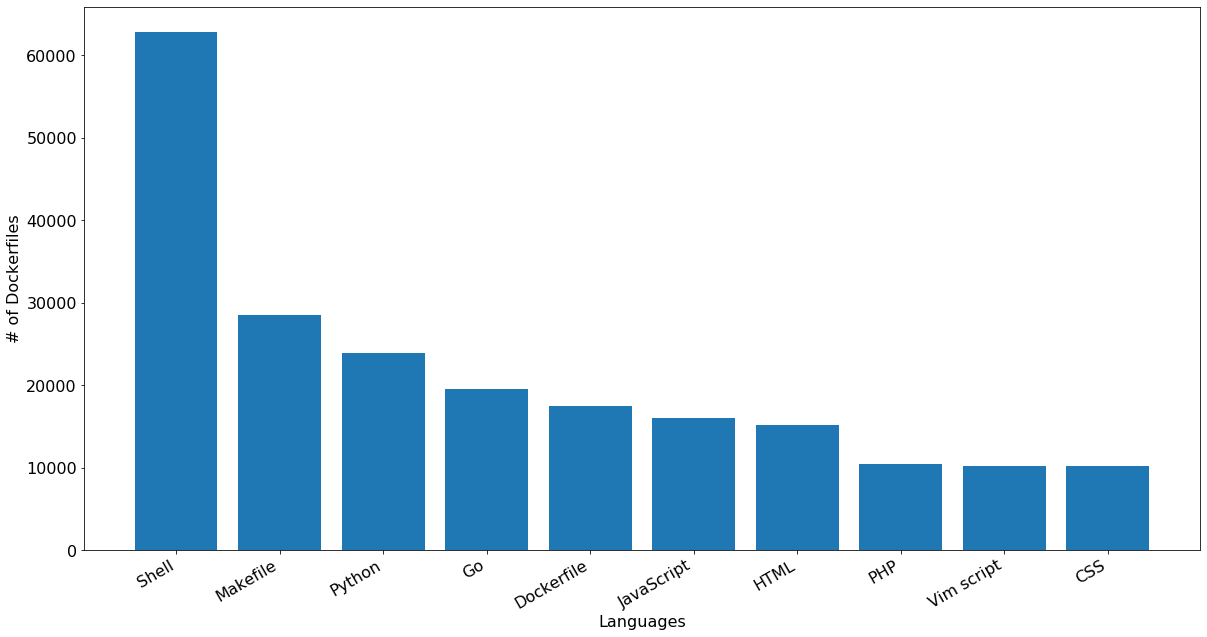

In [18]:
disp = language_index.sort_values('count', ascending=False)[0:10]

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(disp['languages'], disp['count'])
plt.xlabel("Languages")
plt.ylabel("# of Dockerfiles")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

##### Language Test
Using our inverted index, we can do a preliminary recommendation. Lets try to guess what packages, ports and image will be important if we wanted to write a dockerfile for a project written mostly in Python.<br>

We can see that when writing dockerfiles for a Python project we would need the following dependencies:<br>
`git, curl, unzip, build-essential, wget,  python-dev, python-pip, libgtest-dev, libtool, make`<br>

Ports 80, 8080 and 22 are the most popular choices. While different versions of ubuntu, debian and python top the image lists.

In [19]:
test_language = 'Python'

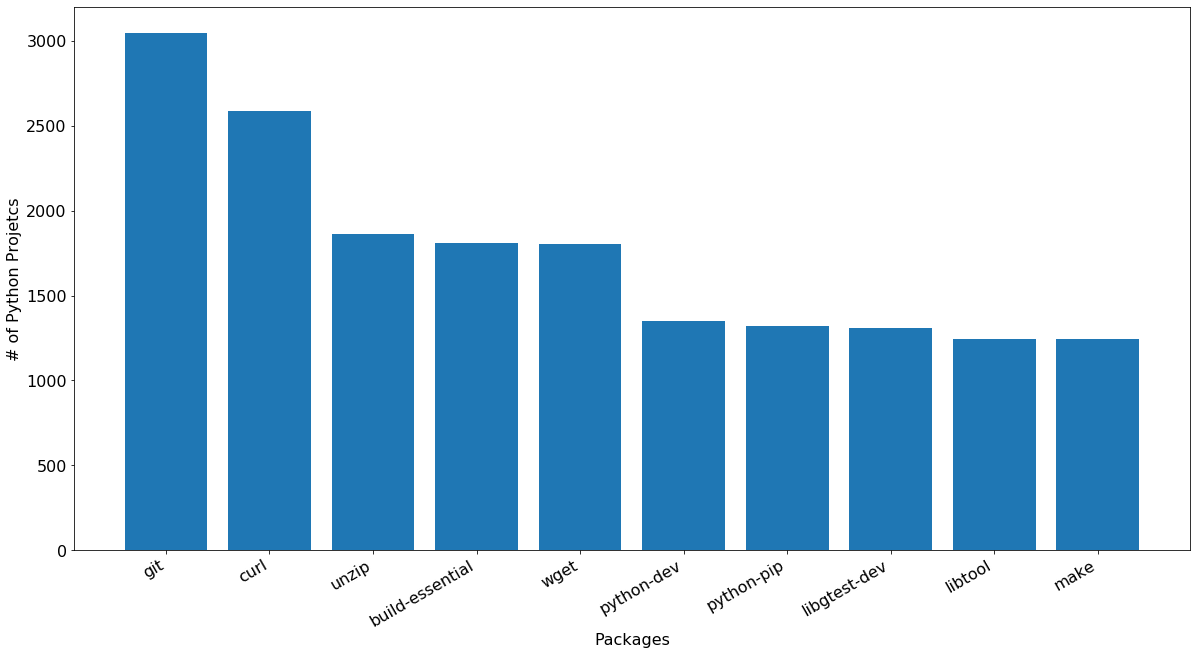

In [20]:
run_ins_df = get_indexed_runs(engine)
disp = get_param_packages(run_ins_df, language_index, 'languages', test_language)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(disp.keys(), disp.values())
plt.xlabel("Packages")
plt.ylabel("# of {} Projetcs".format(test_language))
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

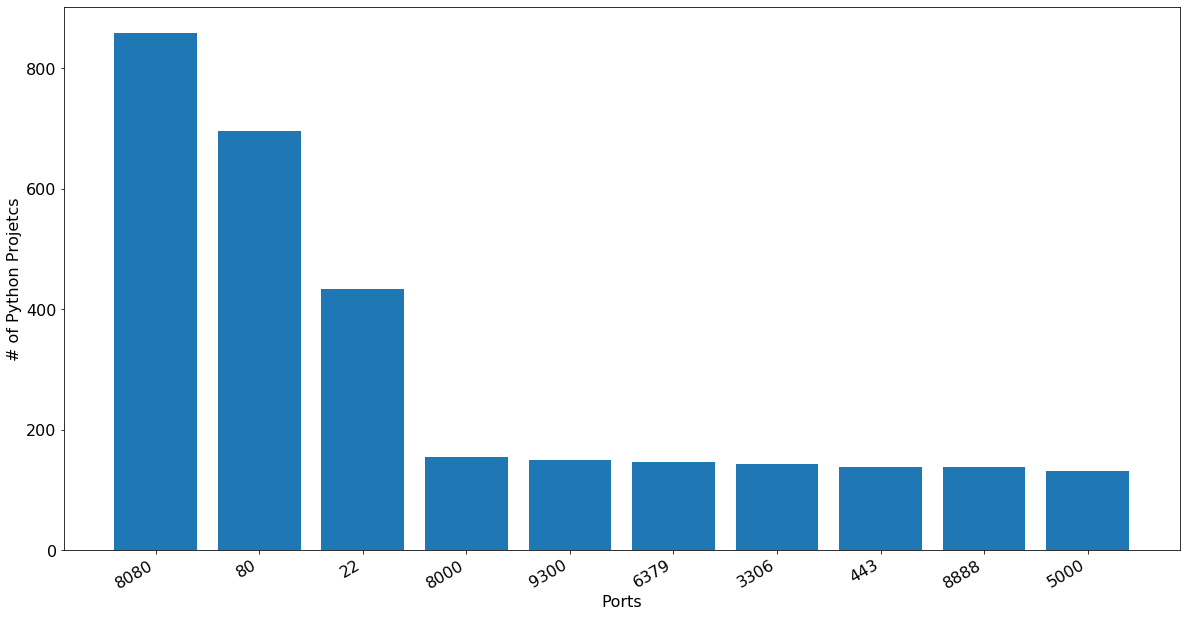

In [21]:
ports_df = get_indexed_ports(engine)
disp = get_param_ports(ports_df, language_index, 'languages', test_language)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(list(map(str, disp.keys().tolist())), disp.values.tolist())
plt.xlabel("Ports")
plt.ylabel("# of {} Projetcs".format(test_language))
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

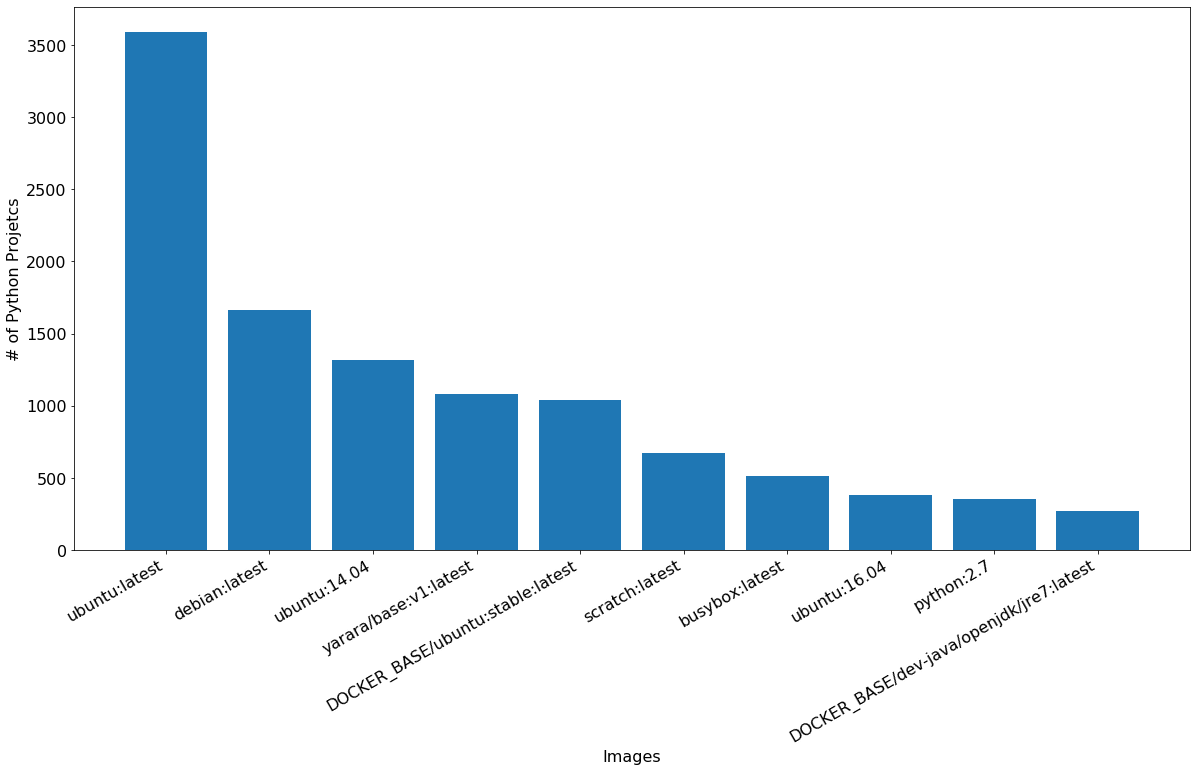

In [22]:
image_df = get_image_data(engine)
disp = get_param_images(image_df, language_index, 'languages', test_language)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(['{}:{}'.format(row.imagename, row.imageversionnumber) for _, row in disp.iterrows()], disp['count'].tolist())
plt.xlabel("Images")
plt.ylabel("# of {} Projetcs".format(test_language))
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

### Topics
Repositories on Github can have the option to add topics linked with their projects. Think of these as tags, they improve the repository searchability. Most large-scale, heavily-starred projects have multiple topics associated with them.

In [23]:
topic_index = get_inverted_index(top_git_snaps, 'topics')

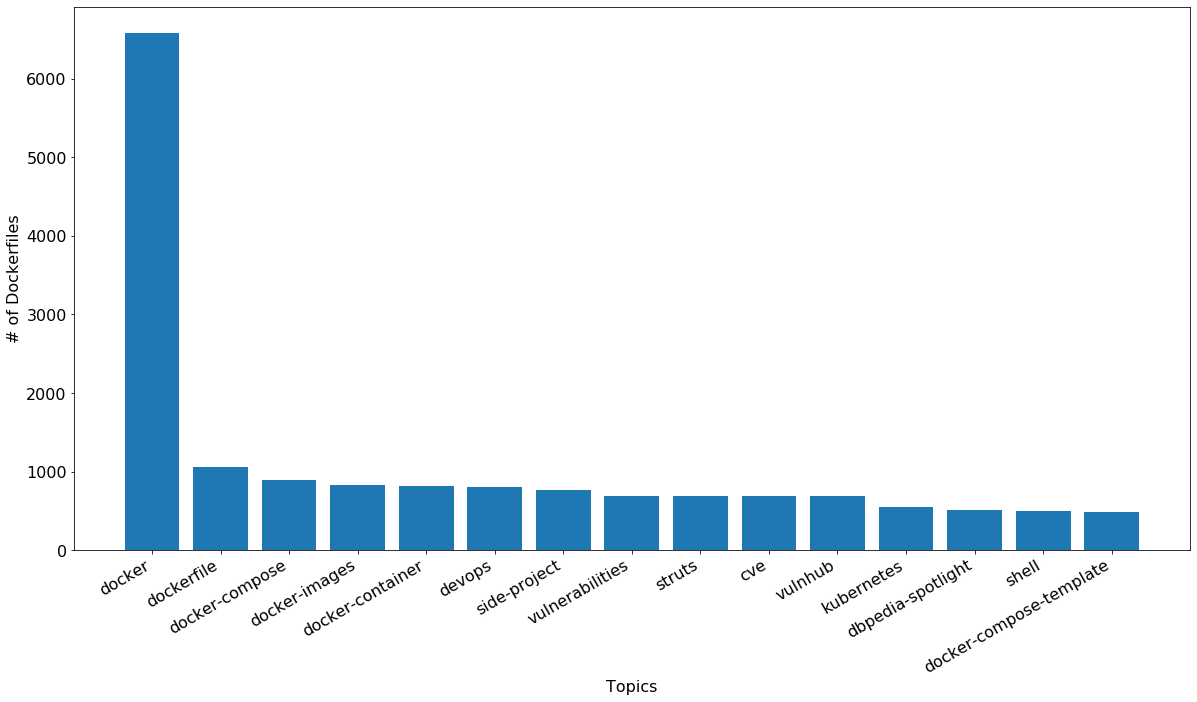

In [24]:
disp = topic_index.sort_values('count', ascending=False)[0:15]

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(disp['topics'], disp['count'])
plt.xlabel("Topics")
plt.ylabel("# of Dockerfiles")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

##### Topic Test
Using our inverted index, we can do a preliminary recommendation. Lets try to guess what packages, ports and image will be important if we wanted to write a dockerfile for a project titled 'docker'.<br>

We can see that when writing dockerfiles for a Python project we would need the following dependencies:<br>
`curl, wget, unzip, build-essential, git,  automake, openjdk-6-jre, ca-certificates, php5-mysql, snmp`<br>

Ports 80, 8080 and 443 are the most popular choices. While different versions of ubuntu and java top the image lists.

In [25]:
test_topic = 'docker'

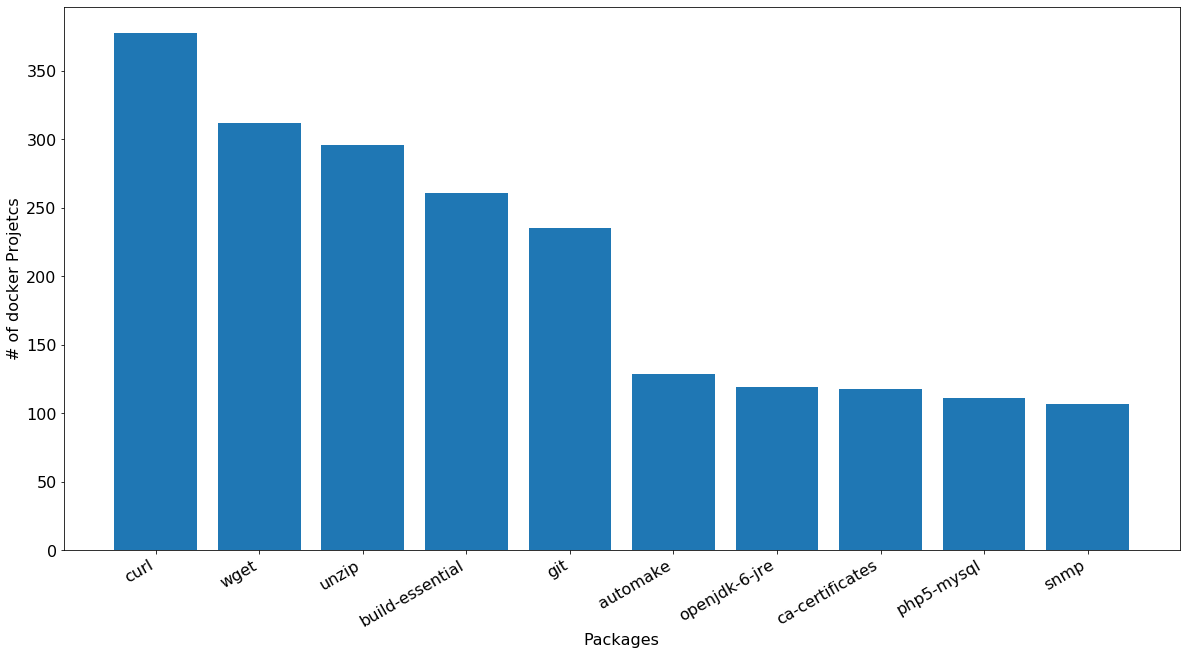

In [26]:
run_ins_df = get_indexed_runs(engine)
disp = get_param_packages(run_ins_df, topic_index, 'topics', test_topic)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(disp.keys(), disp.values())
plt.xlabel("Packages")
plt.ylabel("# of {} Projetcs".format(test_topic))
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

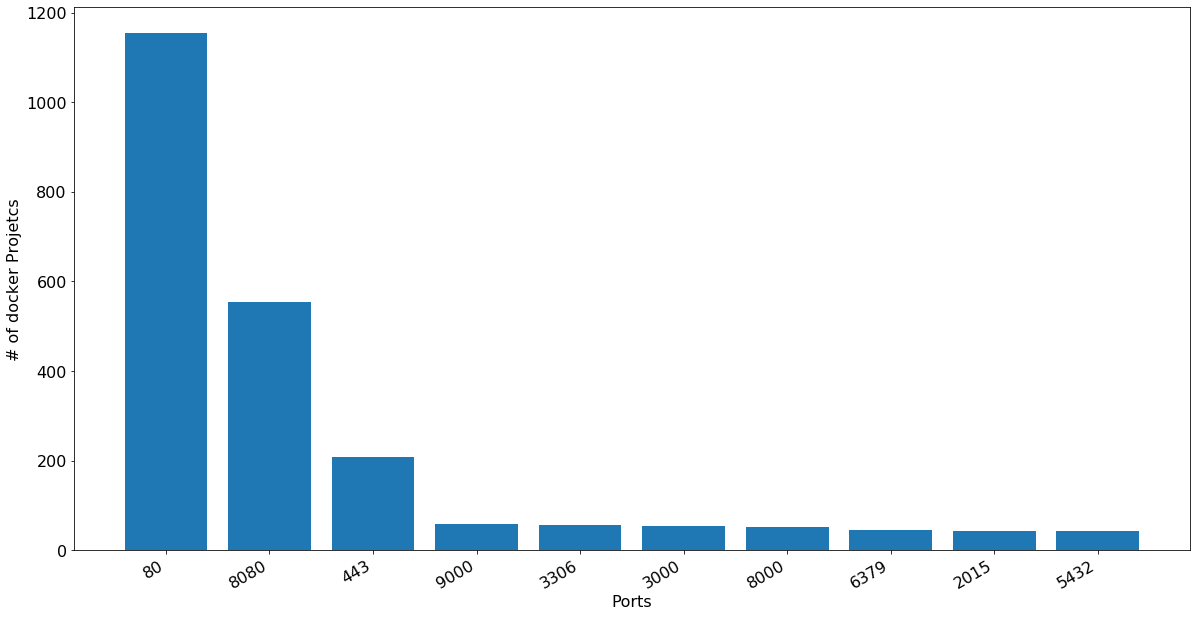

In [27]:
ports_df = get_indexed_ports(engine)
disp = get_param_ports(ports_df, topic_index, 'topics', test_topic)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(list(map(str, disp.keys().tolist())), disp.values.tolist())
plt.xlabel("Ports")
plt.ylabel("# of {} Projetcs".format(test_topic))
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

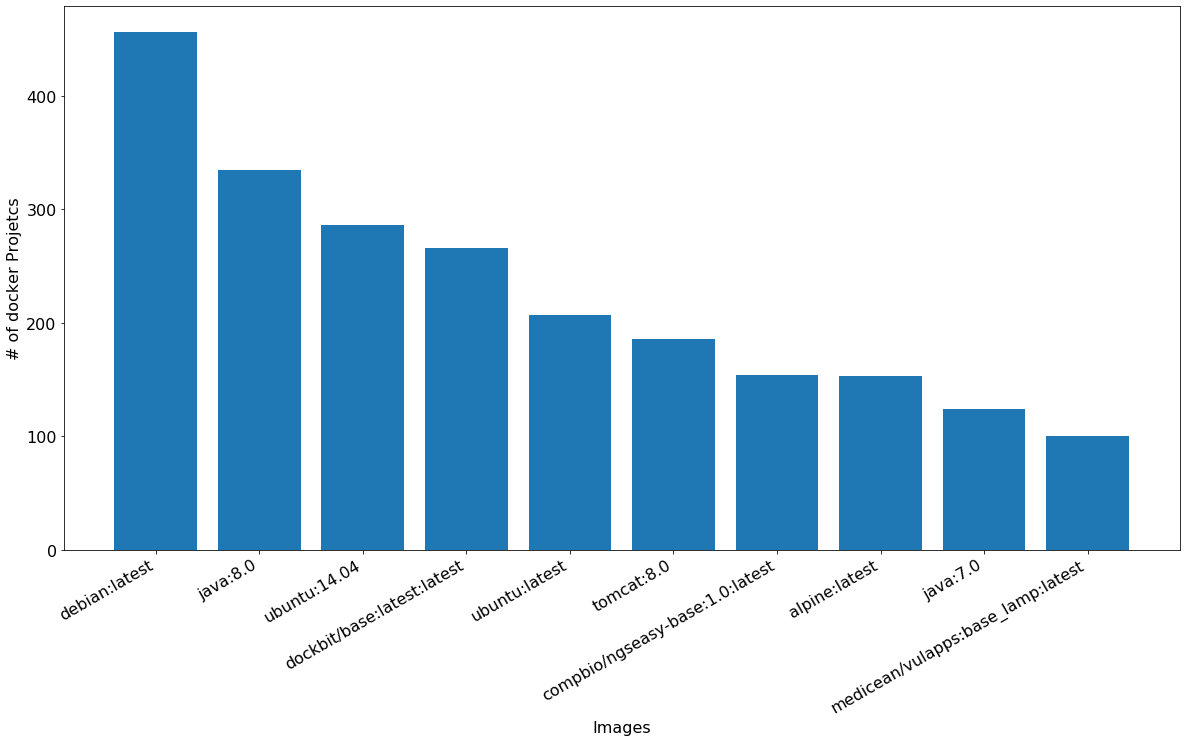

In [28]:
image_df = get_image_data(engine)
disp = get_param_images(image_df, topic_index, 'topics', test_topic)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))
plt.bar(['{}:{}'.format(row.imagename, row.imageversionnumber) for _, row in disp.iterrows()], disp['count'].tolist())
plt.xlabel("Images")
plt.ylabel("# of {} Projetcs".format(test_topic))
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

## Discussion
This spotlight showcases that aforementioned dataset can be used to create good recommenders for writing dockerfiles. While the basic lookups can be easily (some have been) implemeneted in this notebook, there are some advanced techniques that I would like to discuss as well.

#### word2vec
The idea of using Github topic is an interesting idea and we can use the technique of word2vec to generate ralted words that can have more hits in the database and produce effective results.

#### learning
An aspect of learning can also be introduced here. The dataset can be split into train, test and validate sets and using the features explained above we can provide recommendations, gain feedback and improve the recommender model.

## References
<ol>
    <li>G. Schermann, S. Zumberi, J. Cito, "Structured Information on State and Evolution of Dockerfiles on Github", MSR '18: Proceedings of the 15th International Conference on Mining Software Repositories, May 2018, Pages 26–29</li>
    <li>https://raygun.com/blog/what-is-docker/</li>
    <li>https://github.com/sealuzh/msr18-docker-dataset</li>
    <li>https://www.postgresql.org/</li>
    <li>https://www.pgadmin.org/</li>
    <li>https://www.postgresqltutorial.com/postgresql-create-database/</li>
    <li>https://zenodo.org/record/1200869/files/msr18_docker_dataset.sql.gz</li>
    <li>https://docs.docker.com/develop/develop-images/dockerfile_best-practices/</li>
    <li>https://matplotlib.org/devdocs/index.html</li>
    <li>https://developer.github.com/</li>
    <li>https://requests.readthedocs.io/en/master/</li>
    <li>https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533</li>
    <li>https://docs.sqlalchemy.org/en/13/index.html</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/index.html</li>
    <li>https://docs.docker.com/registry/spec/api/</li>
</ol>